In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Chargement du dataset
df= pd.read_excel('2022_07_01_fr_Channels_TOTAL_WIZDEO.xlsx')

# Observer le dataframe via un tableau  
df

id YPP Eligile content_owner_id                display_name  \
0       598647         NaN         Musicast                         PNL   
1       976433         NaN              WMG                Aya Nakamura   
2        87385         NaN     julsaintjean              DORETDEPLATINE   
3        48376         NaN      Not Partner                   NRJMOBILE   
4      2466336           y      Not Partner               GAZO OFFICIEL   
...        ...         ...              ...                         ...   
36967  2663197         NaN              NaN  La chaîne de Serge Faubert   
36968  2663274         NaN              NaN                       Zeg P   
36969  2664118         NaN              NaN                FAN DE YANNS   
36970  2664235         NaN      Not Partner                CAUET SHORTS   
36971  2664318         NaN      Not Partner                 Reda Hezzaz   

                   yt_user_id  \
0      tBjt766LG9EDVKZx4Q4IHw   
1      -69vhXlCa3XHbF8JHCQHfg   
2      -GI5LST5T3Gw93yZxjdFaw   
3      guhDKqVP5zzs3R0Gi8dc7Q   
4      n2DAE87nJp01zbFmUI8V5A   
...                       ...   
36967  YkZbyXcVmtdRUpCBi713vw   
36968  03zElk3Y0AQAuIJZ3GhnAw   
36969  GFIs17OSrKW_yC3XfVxAKw   
36970  yN2A4xqjy-EG-SEaGugUNQ   
36971  3Wnfl5-BKJynckxer670sA   

                                                 summary country language  \
0      Nouvel album « Deux Frères » disponible mainte...      fr       fr   
1      Welcome to Aya Nakamura’s official channel !<b...      fr       fr   
2      Nouvel album disponible :  https://jul.bfan.li...      fr       fr   
3      Découvrez toutes les vidéos de la chaîne Youtu...      fr       fr   
4                                             #MALAGANGX      fr       fr   
...                                                  ...     ...      ...   
36967  Rendez-vous le 23 juin sur cette chaîne pour r...      fr       fr   
36968                                                NaN      fr       fr   
36969  Yanns voit le jour en 1998 à Metz d'une mère d...      fr       fr   
36970  Salut c'est Cauet ! Bienvenue sur ma nouvelle ...      fr       fr   
36971                          Styliste Créateur de mode      fr       fr   

       made_for_kids  self_declared_made_for_kids  ...  75_quantile_views  \
0                0.0                          NaN  ...          6132083.0   
1                0.0                          NaN  ...          6159811.0   
2                NaN                          NaN  ...          2079383.0   
3                NaN                          NaN  ...          7332202.0   
4                NaN                          NaN  ...                NaN   
...              ...                          ...  ...                ...   
36967            NaN                          NaN  ...                NaN   
36968            NaN                          NaN  ...                NaN   
36969            0.0                          NaN  ...                NaN   
36970            0.0                          NaN  ...                NaN   
36971            0.0                          NaN  ...                NaN   

      90_quantile_views  97_quantile_views           category  \
0            10878882.0         20982887.0            musique   
1            13946156.0         20132690.0            musique   
2             7859371.0          8044705.0            musique   
3             9471659.0         24284650.0  science et techno   
4            11856897.0                NaN            musique   
...                 ...                ...                ...   
36967             817.0                NaN  actu et politique   
36968            1496.0                NaN            musique   
36969               NaN                NaN            musique   
36970               NaN                NaN     divertissement   
36971               NaN                NaN    people et blogs   

       nbVidSince_2021-06-30  UC                ID YouTube  \
0                    

In [4]:
# Nombre d'élément totaux du dataframe
len(df)

36972

In [5]:
# Affiche les noms des colonnes
print(df.columns.tolist())

['id', 'YPP Eligile', 'content_owner_id', 'display_name', 'yt_user_id', 'summary', 'country', 'language', 'made_for_kids', 'self_declared_made_for_kids', 'made_for_kids_ratio', 'source', 'tracking_level', 'videos', 'videos_1d', 'videos_1w', 'videos_1m', 'videos_3m', 'videos_3y', 'videos_uploaded', 'videos_uploaded_1d', 'videos_uploaded_1w', 'videos_uploaded_1m', 'videos_uploaded_3m', 'subscribers', 'subscribers_1d', 'subscribers_1w', 'subscribers_1m', 'subscribers_3m', 'videos_views', 'videos_views_1d', 'videos_views_1w', 'videos_views_1m', 'videos_views_3m', 'avg_videos_views', 'avg_videos_watchtime', 'avg_videos_views_days', '30d_stats_type', '30d_average_views', '30d_likes_rate', '30d_dislikes_rate', '30d_comments_rate', '30d_best_engagement_rate', '60d_average_views', '60d_average_views_type', '60d_views_rate', '60d_average_comments', '60d_average_comments_type', '60d_comments_rate', '60d_average_likes', '60d_average_likes_type', '60d_likes_rate', '60d_average_dislikes', '60d_avera

In [6]:
# Affiche le type de chaque colonne
print(df.dtypes)

id                      int64
YPP Eligile            object
content_owner_id       object
display_name           object
yt_user_id             object
                        ...  
UC                     object
ID YouTube             object
Derniere Video         object
Date de publication    object
created                object
Length: 227, dtype: object


In [7]:
# Afficher les premières lignes d'une colonne spécifique
print(df['90_quantile_views'].head(500))


0      10878882.0
1      13946156.0
2       7859371.0
3       9471659.0
4      11856897.0
          ...    
495      118383.0
496       94790.0
497      931773.0
498     1062690.0
499      725398.0
Name: 90_quantile_views, Length: 500, dtype: float64


In [8]:
# Filtrage des colonnes nécessaires pour notre analyse de survie d'une chaîne 

df_filter= df.filter(['display_name','subscribers','created','category','content_owner_id','videos_views','videos','comments','likes','dislikes','Derniere Video','Date de publication', "nbVidSince_2021-06-30"])

# Affiche le dataframe filtré
df_filter

display_name  subscribers                      created  \
0                             PNL    5670000.0         2014-04-10T07:45:01Z   
1                    Aya Nakamura    6690000.0         2016-06-20T14:57:21Z   
2                  DORETDEPLATINE    6130000.0         2012-11-21T23:37:19Z   
3                       NRJMOBILE       7840.0         2007-03-15T15:53:15Z   
4                   GAZO OFFICIEL     751000.0         2010-10-08T21:48:49Z   
...                           ...          ...                          ...   
36967  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   
36968                       Zeg P       1580.0  2022-06-16T15:35:28.067925Z   
36969                FAN DE YANNS     133000.0                            0   
36970                CAUET SHORTS      13700.0   2022-06-01T10:43:42.55941Z   
36971                 Reda Hezzaz          NaN         2011-09-29T13:35:40Z   

                category content_owner_id  videos_views  videos   comments  \
0                musique         Musicast    2131159563      28   771374.0   
1                musique              WMG    3189184669      26   512196.0   
2                musique     julsaintjean    3729852881     237  1251405.0   
3      science et techno      Not Partner      49212935      44      403.0   
4                musique      Not Partner     291199368      18    56723.0   
...                  ...              ...           ...     ...        ...   
36967  actu et politique              NaN        817354       3    11258.0   
36968            musique              NaN        596265       1        NaN   
36969            musique              NaN      44760558     416        NaN   
36970     divertissement      Not Partner       2886157      31        NaN   
36971    people et blogs      Not Partner        712915      51        NaN   

            likes   dislikes  \
0      12832036.0   589340.0   
1      16603127.0   915274.0   
2      23614072.0  1734075.0   
3          5568.0     1898.0   
4       2413204.0    46037.0   
...           ...        ...   
36967     67898.0      778.0   
36968         NaN        NaN   
36969         NaN        NaN   
36970         NaN        NaN   
36971         NaN        NaN   

                                          Derniere Video  \
0                           PNL - Blanka [Clip Officiel]   
1                    Aya Nakamura - Baby (Clip officiel)   
2      JuL - Canette dans les mains // Clip Officiel ...   
3      #CaVautCarrémentLeCoup - Récupérer son ex - NR...   
4                                        GAZO - HENNESSY   
...                                                  ...   
36967  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   
36968  ZEG P Ft. Hamza &amp; SCH - Fade Up (Official ...   
36969                                       Pas de video   
36970            Celui qui fait déborder le vase à perdu   
36971  في بعض الأحيان اتبع خطوات الشيطان كي تسلم من ا...   

        Date de publication  nbVidSince_2021-06-30  
0      2019-08-02T18:00:04Z                      0  
1      2023-01-12T16:00:10Z                      2  
2      2023-01-25T18:29:09Z                     36  
3      2023-01-13T13:00:55Z                      0  
4      2022-10-27T18:00:10Z                      5  
...                     ...                    ...  
36967  2023-02-20T18:30:47Z                      3  
36968  2022-06-23T22:00:06Z                      1  
36969                   NaN                    416  
36970  2023-02-05T17:00:42Z                     31  
36971  2022-09-23T20:12:53Z                     42  

[36972 rows x 13 columns]

In [9]:
# On supprime toutes les catégories 'musique' car non pertinantes pour nos analyses 
# Comme expliqué dans le mémoire elles peuvent être biaisante par rapport au ratio de vues/vidéos
df_filter=df_filter[(df_filter['category'] != 'musique')]
df_filter

display_name  subscribers                      created  \
3                       NRJMOBILE       7840.0         2007-03-15T15:53:15Z   
7                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
10                       Mister V    5950000.0         2008-11-20T20:37:04Z   
12                       SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
14                        Cyprien   14400000.0         2007-02-25T22:14:05Z   
...                           ...          ...                          ...   
36965                Ibermax Info          NaN                            0   
36966                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
36967  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   
36970                CAUET SHORTS      13700.0   2022-06-01T10:43:42.55941Z   
36971                 Reda Hezzaz          NaN         2011-09-29T13:35:40Z   

                category  content_owner_id  videos_views  videos    comments  \
3      science et techno       Not Partner      49212935      44       403.0   
7        people et blogs       Not Partner      62674059       2     12629.0   
10                humour  Golden Network A     429912812      29    331434.0   
12        divertissement              Bump    9160358350    1464  14947334.0   
14                humour       TalentWeb_A    2990519445     205   3653340.0   
...                  ...               ...           ...     ...         ...   
36965  actu et politique               NaN        158326     310         NaN   
36966         jeux video       Not Partner        211928       2         NaN   
36967  actu et politique               NaN        817354       3     11258.0   
36970     divertissement       Not Partner       2886157      31         NaN   
36971    people et blogs       Not Partner        712915      51         NaN   

             likes   dislikes  \
3           5568.0     1898.0   
7         348226.0     4568.0   
10      11418864.0   146141.0   
12     321530757.0  5401198.0   
14      80004547.0  2028946.0   
...            ...        ...   
36965        275.0        8.0   
36966          NaN        NaN   
36967      67898.0      778.0   
36970          NaN        NaN   
36971          NaN        NaN   

                                          Derniere Video  \
3      #CaVautCarrémentLeCoup - Récupérer son ex - NR...   
7                               Dinor rdt - Roue Arrière   
10                                  MISTER V - LES JONES   
12     Elle a fait une sombre découverte... (4 vraies...   
14         Vous n&#39;avez pas vu ça (making of Fujisan)   
...                                                  ...   
36965                                       Pas de video   
36966       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
36967  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   
36970            Celui qui fait déborder le vase à perdu   
36971  في بعض الأحيان اتبع خطوات الشيطان كي تسلم من ا...   

        Date de publication  nbVidSince_2021-06-30  
3      2023-01-13T13:00:55Z                      0  
7      2022-06-29T18:00:12Z                      2  
10     2022-12-11T17:00:30Z                      2  
12     2023-02-22T17:49:02Z                     63  
14     2022-12-27T12:32:43Z                     22  
...                     ...                    ...  
36965                   NaN                    299  
36966  2023-02-24T15:00:04Z                      3  
36967  2023-02-20T18:30:47Z                      3  
36970  2023-02-05T17:00:42Z                     31  
36971  2022-09-23T20:12:53Z                     42  

[31474 rows x 13 columns]

In [10]:
# On supprime les chaînes ayant aucune vidéo car pouvant être des bots/fake channel
df_filter=df_filter[(df_filter['Derniere Video']!='Pas de video')]
df_filter

display_name  subscribers                      created  \
3                       NRJMOBILE       7840.0         2007-03-15T15:53:15Z   
7                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
10                       Mister V    5950000.0         2008-11-20T20:37:04Z   
12                       SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
14                        Cyprien   14400000.0         2007-02-25T22:14:05Z   
...                           ...          ...                          ...   
36964              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
36966                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
36967  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   
36970                CAUET SHORTS      13700.0   2022-06-01T10:43:42.55941Z   
36971                 Reda Hezzaz          NaN         2011-09-29T13:35:40Z   

                category  content_owner_id  videos_views  videos    comments  \
3      science et techno       Not Partner      49212935      44       403.0   
7        people et blogs       Not Partner      62674059       2     12629.0   
10                humour  Golden Network A     429912812      29    331434.0   
12        divertissement              Bump    9160358350    1464  14947334.0   
14                humour       TalentWeb_A    2990519445     205   3653340.0   
...                  ...               ...           ...     ...         ...   
36964         jeux video               NaN       3001227      22      3724.0   
36966         jeux video       Not Partner        211928       2         NaN   
36967  actu et politique               NaN        817354       3     11258.0   
36970     divertissement       Not Partner       2886157      31         NaN   
36971    people et blogs       Not Partner        712915      51         NaN   

             likes   dislikes  \
3           5568.0     1898.0   
7         348226.0     4568.0   
10      11418864.0   146141.0   
12     321530757.0  5401198.0   
14      80004547.0  2028946.0   
...            ...        ...   
36964      60602.0      492.0   
36966          NaN        NaN   
36967      67898.0      778.0   
36970          NaN        NaN   
36971          NaN        NaN   

                                          Derniere Video  \
3      #CaVautCarrémentLeCoup - Récupérer son ex - NR...   
7                               Dinor rdt - Roue Arrière   
10                                  MISTER V - LES JONES   
12     Elle a fait une sombre découverte... (4 vraies...   
14         Vous n&#39;avez pas vu ça (making of Fujisan)   
...                                                  ...   
36964  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
36966       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
36967  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   
36970            Celui qui fait déborder le vase à perdu   
36971  في بعض الأحيان اتبع خطوات الشيطان كي تسلم من ا...   

        Date de publication  nbVidSince_2021-06-30  
3      2023-01-13T13:00:55Z                      0  
7      2022-06-29T18:00:12Z                      2  
10     2022-12-11T17:00:30Z                      2  
12     2023-02-22T17:49:02Z                     63  
14     2022-12-27T12:32:43Z                     22  
...                     ...                    ...  
36964  2023-01-22T10:00:29Z                      4  
36966  2023-02-24T15:00:04Z                      3  
36967  2023-02-20T18:30:47Z                      3  
36970  2023-02-05T17:00:42Z                     31  
36971  2022-09-23T20:12:53Z                     42  

[27396 rows x 13 columns]

In [11]:
# On supprime les chaines en doubles
doublons = df_filter[df_filter['display_name'].duplicated(keep=False)]
doublons

display_name  subscribers               created         category  \
12              SQUEEZIE   17100000.0  2011-01-09T01:56:21Z   divertissement   
68                Michou    7560000.0  2015-02-22T18:30:44Z   divertissement   
664                PITCH       1350.0  2013-04-16T09:42:31Z   divertissement   
805     Furax Barbarossa      74200.0  2017-02-01T15:50:26Z  people et blogs   
891              Donovan     588000.0  2015-08-29T11:55:35Z  people et blogs   
...                  ...          ...                   ...              ...   
36489             Franck      20400.0  2011-10-02T13:36:34Z   divertissement   
36498  Les Grosses Têtes      30200.0  2015-11-09T11:56:53Z   divertissement   
36640              Shino      11300.0  2012-03-28T19:29:08Z       jeux video   
36691           Marianne      13500.0  2015-01-18T14:11:11Z  people et blogs   
36738              Lowan        361.0  2016-04-24T10:54:13Z   divertissement   

                content_owner_id  videos_views  videos    comments  \
12                          Bump    9160358350    1464  14947334.0   
68     Talent Web France Managed    1778443608     642   3411826.0   
664                  Not Partner        637812       7         0.0   
805                Believe Music      29892050      94     11334.0   
891              Webedia Talents      82573419     224     64264.0   
...                          ...           ...     ...         ...   
36489                Not Partner        113355       2       406.0   
36498                        NaN      21002971      87      2151.0   
36640                Not Partner        405153      45      1153.0   
36691                Not Partner       2985531      65      1961.0   
36738                        NaN             0       0         NaN   

             likes   dislikes  \
12     321530757.0  5401198.0   
68      83285875.0  1746429.0   
664           18.0        4.0   
805       186468.0     3754.0   
891      5866462.0    84707.0   
...            ...        ...   
36489       9078.0       71.0   
36498      77868.0     6979.0   
36640      14875.0      211.0   
36691      41082.0     3227.0   
36738          NaN        NaN   

                                          Derniere Video  \
12     Elle a fait une sombre découverte... (4 vraies...   
68        Michou - B22 ft. Gueule d’Ange (Clip Officiel)   
664    Pitch bio, chocobarre ou pépites, on est tous ...   
805    Furax Barbarossa - Dites au revoir à Printemps...   
891                   Toi aussi tu veux des pochettes? 😂   
...                                                  ...   
36489        LE RÉSERVOIR D&#39;EAU DE PARIS - STREET #1   
36498          Les grosses têtes en spectacle - Partie 7   
36640                                  LA FIN - PORTAL 2   
36691                                      APPART TOUR !   
36738                       REPRISE DES LIVES ! PURPLEMC   

        Date de publication  nbVidSince_2021-06-30  
12     2023-02-22T17:49:02Z                     63  
68     2023-02-15T17:00:34Z                     72  
664    2022-06-03T15:55:52Z                      5  
805    2023-02-17T17:00:06Z                      5  
891    2023-02-20T17:30:00Z                    165  
...                     ...                    ...  
36489  2019-04-26T17:21:49Z                      0  
36498  2019-12-20T16:30:01Z                      0  
36640  2019-03-26T18:33:22Z                      0  
36691  2019-11-28T20:12:58Z                      0  
36738  2019-07-17T11:27:53Z                      0  

[156 rows x 13 columns]

In [12]:
# On supprime les chaines n'ayant pas d'abonnées
df_filter = df_filter.dropna(subset=['subscribers'])
df_filter

display_name  subscribers  \
3                                  NRJMOBILE       7840.0   
7                                  Dinor Rdt     394000.0   
10                                  Mister V    5950000.0   
12                                  SQUEEZIE   17100000.0   
14                                   Cyprien   14400000.0   
...                                      ...          ...   
36961  Sauter Service Assistance Vidéo Tutos        537.0   
36964                         TheGreatReview      99600.0   
36966                               AMELINKA      45400.0   
36967             La chaîne de Serge Faubert      69400.0   
36970                           CAUET SHORTS      13700.0   

                           created           category  content_owner_id  \
3             2007-03-15T15:53:15Z  science et techno       Not Partner   
7             2015-02-04T22:27:39Z    people et blogs       Not Partner   
10            2008-11-20T20:37:04Z             humour  Golden Network A   
12            2011-01-09T01:56:21Z     divertissement              Bump   
14            2007-02-25T22:14:05Z             humour       TalentWeb_A   
...                            ...                ...               ...   
36961         2016-10-20T13:18:14Z  science et techno               NaN   
36964         2015-05-14T14:16:36Z         jeux video               NaN   
36966  2019-12-07T11:57:58.242424Z         jeux video       Not Partner   
36967         2017-03-30T08:35:29Z  actu et politique               NaN   
36970   2022-06-01T10:43:42.55941Z     divertissement       Not Partner   

       videos_views  videos    comments        likes   dislikes  \
3          49212935      44       403.0       5568.0     1898.0   
7          62674059       2     12629.0     348226.0     4568.0   
10        429912812      29    331434.0   11418864.0   146141.0   
12       9160358350    1464  14947334.0  321530757.0  5401198.0   
14       2990519445     205   3653340.0   80004547.0  2028946.0   
...             ...     ...         ...          ...        ...   
36961        399214      36         2.0        689.0      123.0   
36964       3001227      22      3724.0      60602.0      492.0   
36966        211928       2         NaN          NaN        NaN   
36967        817354       3     11258.0      67898.0      778.0   
36970       2886157      31         NaN          NaN        NaN   

                                          Derniere Video  \
3      #CaVautCarrémentLeCoup - Récupérer son ex - NR...   
7                               Dinor rdt - Roue Arrière   
10                                  MISTER V - LES JONES   
12     Elle a fait une sombre découverte... (4 vraies...   
14         Vous n&#39;avez pas vu ça (making of Fujisan)   
...                                                  ...   
36961  Comment associer Sauter Cozytouch à Google Home ?   
36964  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
36966       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
36967  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   
36970            Celui qui fait déborder le vase à perdu   

        Date de publication  nbVidSince_2021-06-30  
3      2023-01-13T13:00:55Z                      0  
7      2022-06-29T18:00:12Z                      2  
10     2022-12-11T17:00:30Z                      2  
12     2023-02-22T17:49:02Z                     63  
14     2022-12-27T12:32:43Z                     22  
...                     ...                    ...  
36961  2022-11-03T14:16:14Z                      7  
36964  2023-01-22T10:00:29Z                      4  
36966  2023-02-24T15:00:04Z                      3  
36967  2023-02-20T18:30:47Z                      3  
36970  2023-02-05T17:00:42Z                     31  

[25547 rows x 13 columns]

In [13]:
# On regarde la médiane dans une premier temps du nombre d'abonnés de toutes les chaînes 
# Puis on ne sélectionne, dans df_top, que les chaînes supérieures à cette médiane
df_filter['subscribers'].median()
df_top= df_filter[(df_filter['subscribers']>df_filter['subscribers'].median())]
df_top

display_name  subscribers                      created  \
7                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
10                       Mister V    5950000.0         2008-11-20T20:37:04Z   
12                       SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
14                        Cyprien   14400000.0         2007-02-25T22:14:05Z   
19         NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
36958                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
36960           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
36964              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
36966                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
36967  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
7        people et blogs       Not Partner      62674059       2     12629.0   
10                humour  Golden Network A     429912812      29    331434.0   
12        divertissement              Bump    9160358350    1464  14947334.0   
14                humour       TalentWeb_A    2990519445     205   3653340.0   
19                humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
36958    people et blogs       Not Partner      68086620       2       478.0   
36960         jeux video               NaN       3831511     147      6875.0   
36964         jeux video               NaN       3001227      22      3724.0   
36966         jeux video       Not Partner        211928       2         NaN   
36967  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
7         348226.0     4568.0   
10      11418864.0   146141.0   
12     321530757.0  5401198.0   
14      80004547.0  2028946.0   
19      65923055.0  1895361.0   
...            ...        ...   
36958      28724.0      613.0   
36960     209014.0     2030.0   
36964      60602.0      492.0   
36966          NaN        NaN   
36967      67898.0      778.0   

                                          Derniere Video  \
7                               Dinor rdt - Roue Arrière   
10                                  MISTER V - LES JONES   
12     Elle a fait une sombre découverte... (4 vraies...   
14         Vous n&#39;avez pas vu ça (making of Fujisan)   
19           LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
36958  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
36960  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
36964  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
36966       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
36967  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30  
7      2022-06-29T18:00:12Z                      2  
10     2022-12-11T17:00:30Z                      2  
12     2023-02-22T17:49:02Z                     63  
14     2022-12-27T12:32:43Z                     22  
19     2022-11-25T16:06:43Z                     14  
...                     ...                    ...  
36958  2022-06-17T14:00:12Z                      2  
36960  2022-01-01T19:18:52Z                     42  
36964  2023-01-22T10:00:29Z                      4  
36966  2023-02-24T15:00:04Z                      3  
36967  2023-02-20T18:30:47Z                      3  

[12753 rows x 13 columns]

In [14]:
# Remarque du doctorant 
# Dans la category people et blogs -> on observe des chanteurs voici les partenaires que j'ai trouvé avec l'appelation music
df_top = df_top[~df_top['content_owner_id'].isin(['Believe Music','Because Music','Musicast','Emotional Music Channel','The Orchard Music','Djo Music','Aqua Music','Menta Music','WM Music Distribution','TheGoodMusic Within'])]
df_top

display_name  subscribers                      created  \
7                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
10                       Mister V    5950000.0         2008-11-20T20:37:04Z   
12                       SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
14                        Cyprien   14400000.0         2007-02-25T22:14:05Z   
19         NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
36958                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
36960           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
36964              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
36966                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
36967  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
7        people et blogs       Not Partner      62674059       2     12629.0   
10                humour  Golden Network A     429912812      29    331434.0   
12        divertissement              Bump    9160358350    1464  14947334.0   
14                humour       TalentWeb_A    2990519445     205   3653340.0   
19                humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
36958    people et blogs       Not Partner      68086620       2       478.0   
36960         jeux video               NaN       3831511     147      6875.0   
36964         jeux video               NaN       3001227      22      3724.0   
36966         jeux video       Not Partner        211928       2         NaN   
36967  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
7         348226.0     4568.0   
10      11418864.0   146141.0   
12     321530757.0  5401198.0   
14      80004547.0  2028946.0   
19      65923055.0  1895361.0   
...            ...        ...   
36958      28724.0      613.0   
36960     209014.0     2030.0   
36964      60602.0      492.0   
36966          NaN        NaN   
36967      67898.0      778.0   

                                          Derniere Video  \
7                               Dinor rdt - Roue Arrière   
10                                  MISTER V - LES JONES   
12     Elle a fait une sombre découverte... (4 vraies...   
14         Vous n&#39;avez pas vu ça (making of Fujisan)   
19           LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
36958  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
36960  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
36964  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
36966       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
36967  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30  
7      2022-06-29T18:00:12Z                      2  
10     2022-12-11T17:00:30Z                      2  
12     2023-02-22T17:49:02Z                     63  
14     2022-12-27T12:32:43Z                     22  
19     2022-11-25T16:06:43Z                     14  
...                     ...                    ...  
36958  2022-06-17T14:00:12Z                      2  
36960  2022-01-01T19:18:52Z                     42  
36964  2023-01-22T10:00:29Z                      4  
36966  2023-02-24T15:00:04Z                      3  
36967  2023-02-20T18:30:47Z                      3  

[12725 rows x 13 columns]

In [16]:
# Pour détecter les langues
!pip install langdetect

     -------------------------------------- 981.5/981.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=ab8a0785d754bf19afb051414dfbf5b92b2059c23b199e7aeacf1857d48ef910
  Stored in directory: c:\users\andyg\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [17]:
from langdetect import detect

Actif= pd.DataFrame(columns=['Derniere Video', 'Langue'])

for i in df_top['Derniere Video']:

        try:
            langue= detect(i)
            Titre= i
            
        
            Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
    
        except:
            
        
              Actif = Actif.append({'Derniere Video': Titre, 'Langue': 'Pas detecter'}, ignore_index=True)
        continue    

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': 'Pas detecter'}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': 'Pas detecter'}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': 'Pas detecter'}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Actif = Actif.append({'Derniere Video': Titre, 'Langue': langue}, ignore_index=True)
C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\807922263.py:12: FutureWarning: The frame.append method is deprecated and will be removed

In [18]:
# Affichage des chaînes actives 
Actif

Derniere Video Langue
0                               Dinor rdt - Roue Arrière     fr
1                                   MISTER V - LES JONES     de
2      Elle a fait une sombre découverte... (4 vraies...     fr
3          Vous n&#39;avez pas vu ça (making of Fujisan)     tl
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)     fr
...                                                  ...    ...
12720  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...     it
12721  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...     en
12722  Qu&#39;est-ce que le cinéma a appris au jeu vi...     fr
12723       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)     fr
12724  BORDÉLISATION DES DÉBATS : la bonne stratégie,...     fr

[12725 rows x 2 columns]

In [19]:
# Détermine les chaînes les plus actives 
top_channel = pd.merge(df_top, Actif, on='Derniere Video',how='outer')
top_channel

display_name  subscribers                      created  \
0                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
1                        Mister V    5950000.0         2008-11-20T20:37:04Z   
2                        SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
3                         Cyprien   14400000.0         2007-02-25T22:14:05Z   
4          NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
12762                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
12763           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
12764              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
12765                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
12766  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
0        people et blogs       Not Partner      62674059       2     12629.0   
1                 humour  Golden Network A     429912812      29    331434.0   
2         divertissement              Bump    9160358350    1464  14947334.0   
3                 humour       TalentWeb_A    2990519445     205   3653340.0   
4                 humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
12762    people et blogs       Not Partner      68086620       2       478.0   
12763         jeux video               NaN       3831511     147      6875.0   
12764         jeux video               NaN       3001227      22      3724.0   
12765         jeux video       Not Partner        211928       2         NaN   
12766  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
0         348226.0     4568.0   
1       11418864.0   146141.0   
2      321530757.0  5401198.0   
3       80004547.0  2028946.0   
4       65923055.0  1895361.0   
...            ...        ...   
12762      28724.0      613.0   
12763     209014.0     2030.0   
12764      60602.0      492.0   
12765          NaN        NaN   
12766      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  
0      2022-06-29T18:00:12Z                      2     fr  
1      2022-12-11T17:00:30Z                      2     de  
2      2023-02-22T17:49:02Z                     63     fr  
3      2022-12-27T12:32:43Z                     22     tl  
4      2022-11-25T16:06:43Z                     14     fr  
...                     ...                    ...    ...  
12762  2022-06-17T14:00:12Z                      2     it  
12763  2022-01-01T19:18:52Z                     42     en  
12764  2023-01-22T10:00:29Z                      4     fr  
12765  2023-02-24T15:00:04Z                      3     fr  
12766  2023-02-20T18:30:47Z                      3     fr  

[12767 rows x 14 columns]

In [20]:
# Comptage des langues comprises dans les chaînes des gros youtubeurs
top_channel['Langue'].value_counts()

fr              7107
en              2451
de              1185
ca               344
vi               185
pt               176
ar               146
it               129
es               129
so               125
nl                86
ro                83
id                69
no                56
af                56
tl                45
sw                41
fi                35
cy                32
hu                27
et                26
da                25
Pas detecter      24
sv                19
sl                18
tr                16
lt                14
hr                14
th                13
pl                12
lv                 9
ru                 9
sk                 9
cs                 8
bg                 5
ja                 5
ko                 2
sq                 2
fa                 2
mk                 1
bn                 1
zh-cn              1
ta                 1
Name: Langue, dtype: int64

In [21]:
# Supression des grosses chaînes ayant la langue arabe 
# Remarque: Possibilité de suppression d'autres langues 
arabe=top_channel[(top_channel['Langue']=='ar')]
arabe.head()

display_name  subscribers                      created  \
908          Mouad Aboukassim      92000.0  2021-02-07T16:31:20.299129Z   
1005      AYMANE HAMIDI Vlogs     473000.0         2017-05-19T02:13:28Z   
1039      مانو ستارزManostars      94700.0         2016-04-24T22:01:32Z   
1275             Nour Glamour      74100.0  2019-11-18T17:12:06.968225Z   
1316  Recette Lili2 وصفة ليلي     117000.0   2021-02-19T09:24:50.92085Z   

             category            content_owner_id  videos_views  videos  \
908   people et blogs                         NaN       2872828      17   
1005  people et blogs  Amine Hamidi Vlogs Lghorba      21892105     128   
1039  people et blogs                 Not Partner      38658754     411   
1275  people et blogs                         NaN       6914169     149   
1316  people et blogs                         NaN       5863681      65   

      comments      likes  dislikes  \
908     4597.0   225716.0    2003.0   
1005  128831.0  1522385.0   72796.0   
1039   12524.0   780472.0   31318.0   
1275   52062.0   409273.0   21006.0   
1316   11680.0   228351.0    5295.0   

                                         Derniere Video   Date de publication  \
908   صحبي الجزائري توقع النتيجة د الماتش المغرب /بل...  2022-11-30T20:19:02Z   
1005  لقينا سيارات أحلامنا لي غادي نعسو فيها و نسافر...  2023-02-05T19:45:31Z   
1039  رابط الفيديو اول تعليق نزل فيديو طويل 💖بدي دعم...  2023-02-20T22:41:52Z   
1275  وصلتني اكثر من 20 هدية عيد ميلاد 🥹❤️📦/ JAI REÇ...  2023-02-17T20:52:11Z   
1316  مطلوع اول رمضان من أروع مايكون مفشفش وخفيف كال...  2023-02-20T08:51:32Z   

      nbVidSince_2021-06-30 Langue  
908                      17     ar  
1005                      3     ar  
1039                    587     ar  
1275                     55     ar  
1316                     28     ar

In [23]:
top_channel = top_channel[top_channel['Langue'] != 'ar']
top_channel

display_name  subscribers                      created  \
0                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
1                        Mister V    5950000.0         2008-11-20T20:37:04Z   
2                        SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
3                         Cyprien   14400000.0         2007-02-25T22:14:05Z   
4          NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
12762                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
12763           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
12764              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
12765                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
12766  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
0        people et blogs       Not Partner      62674059       2     12629.0   
1                 humour  Golden Network A     429912812      29    331434.0   
2         divertissement              Bump    9160358350    1464  14947334.0   
3                 humour       TalentWeb_A    2990519445     205   3653340.0   
4                 humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
12762    people et blogs       Not Partner      68086620       2       478.0   
12763         jeux video               NaN       3831511     147      6875.0   
12764         jeux video               NaN       3001227      22      3724.0   
12765         jeux video       Not Partner        211928       2         NaN   
12766  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
0         348226.0     4568.0   
1       11418864.0   146141.0   
2      321530757.0  5401198.0   
3       80004547.0  2028946.0   
4       65923055.0  1895361.0   
...            ...        ...   
12762      28724.0      613.0   
12763     209014.0     2030.0   
12764      60602.0      492.0   
12765          NaN        NaN   
12766      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  
0      2022-06-29T18:00:12Z                      2     fr  
1      2022-12-11T17:00:30Z                      2     de  
2      2023-02-22T17:49:02Z                     63     fr  
3      2022-12-27T12:32:43Z                     22     tl  
4      2022-11-25T16:06:43Z                     14     fr  
...                     ...                    ...    ...  
12762  2022-06-17T14:00:12Z                      2     it  
12763  2022-01-01T19:18:52Z                     42     en  
12764  2023-01-22T10:00:29Z                      4     fr  
12765  2023-02-24T15:00:04Z                      3     fr  
12766  2023-02-20T18:30:47Z                      3     fr  

[12621 rows x 14 columns]

In [26]:
top_channel['Date derniere video'] = pd.to_datetime(top_channel['Date de publication'])

top_channel

display_name  subscribers                      created  \
0                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
1                        Mister V    5950000.0         2008-11-20T20:37:04Z   
2                        SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
3                         Cyprien   14400000.0         2007-02-25T22:14:05Z   
4          NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
12762                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
12763           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
12764              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
12765                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
12766  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
0        people et blogs       Not Partner      62674059       2     12629.0   
1                 humour  Golden Network A     429912812      29    331434.0   
2         divertissement              Bump    9160358350    1464  14947334.0   
3                 humour       TalentWeb_A    2990519445     205   3653340.0   
4                 humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
12762    people et blogs       Not Partner      68086620       2       478.0   
12763         jeux video               NaN       3831511     147      6875.0   
12764         jeux video               NaN       3001227      22      3724.0   
12765         jeux video       Not Partner        211928       2         NaN   
12766  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
0         348226.0     4568.0   
1       11418864.0   146141.0   
2      321530757.0  5401198.0   
3       80004547.0  2028946.0   
4       65923055.0  1895361.0   
...            ...        ...   
12762      28724.0      613.0   
12763     209014.0     2030.0   
12764      60602.0      492.0   
12765          NaN        NaN   
12766      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
0      2022-06-29T18:00:12Z                      2     fr   
1      2022-12-11T17:00:30Z                      2     de   
2      2023-02-22T17:49:02Z                     63     fr   
3      2022-12-27T12:32:43Z                     22     tl   
4      2022-11-25T16:06:43Z                     14     fr   
...                     ...                    ...    ...   
12762  2022-06-17T14:00:12Z                      2     it   
12763  2022-01-01T19:18:52Z                     42     en   
12764  2023-01-22T10:00:29Z                      4     fr   
12765  2023-02-24T15:00:04Z                      3     fr   
12766  2023-02-20T18:30:47Z                      3     fr   

            Date derniere video  
0     2022-06-29 18:00:12+00:00  
1     2022-12-11 17:00:30+00:00  
2     2023-02-22 17:49:02+00:00  
3     2022-12-27 12:32:43+00:00  
4     2022-11-25 16:06:43+00:00  
...                         ...  
12762 2022-06-17 14:00

In [27]:
top_channel2=top_channel

In [29]:
import pytz
from datetime import datetime
now = datetime.now(pytz.utc)

# Soustraire la date et l'heure actuelles à la colonne
top_channel2['Temps depuis dernière vidéo (jours)'] = (now - top_channel2['Date derniere video']).dt.days.astype(int)

moyenne_category = top_channel2.groupby('category')['Temps depuis dernière vidéo (jours)'].mean()

df_moyenne_category = pd.DataFrame({'category': moyenne_category.index, 'moyenne': moyenne_category.values})
df_moyenne_category

category      moyenne
0       actu et politique   647.921277
1                 animaux   826.336000
2               auto/moto   675.084112
3          divertissement   819.586930
4               education   709.987692
5      films et animation  1025.543814
6                  humour  1111.180157
7              jeux video   878.446346
8         people et blogs  1052.386269
9       science et techno   689.625551
10                  sport   726.192529
11  vie pratique et style   747.661247
12                voyages   826.812950

In [30]:
# Joindre top_channel2 avec df_median_category sur la colonne 'category'
top_channel3 = top_channel2.join(df_moyenne_category.set_index('category'), on='category')

# Créer une colonne 'Actif' avec des valeurs booléennes en fonction de la différence entre 'Temps depuis dernière vidéo (jours)' et 'mediane'
top_channel3['Actif'] = top_channel3['Temps depuis dernière vidéo (jours)'] < top_channel3['moyenne']

# Convertir les valeurs booléennes en 'Actif' et 'Inactif'
top_channel3['Actif'] = np.where(top_channel3['Actif'], 'Actif', 'Inactif')

top_channel3

display_name  subscribers                      created  \
0                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
1                        Mister V    5950000.0         2008-11-20T20:37:04Z   
2                        SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
3                         Cyprien   14400000.0         2007-02-25T22:14:05Z   
4          NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
12762                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
12763           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
12764              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
12765                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
12766  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
0        people et blogs       Not Partner      62674059       2     12629.0   
1                 humour  Golden Network A     429912812      29    331434.0   
2         divertissement              Bump    9160358350    1464  14947334.0   
3                 humour       TalentWeb_A    2990519445     205   3653340.0   
4                 humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
12762    people et blogs       Not Partner      68086620       2       478.0   
12763         jeux video               NaN       3831511     147      6875.0   
12764         jeux video               NaN       3001227      22      3724.0   
12765         jeux video       Not Partner        211928       2         NaN   
12766  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
0         348226.0     4568.0   
1       11418864.0   146141.0   
2      321530757.0  5401198.0   
3       80004547.0  2028946.0   
4       65923055.0  1895361.0   
...            ...        ...   
12762      28724.0      613.0   
12763     209014.0     2030.0   
12764      60602.0      492.0   
12765          NaN        NaN   
12766      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
0      2022-06-29T18:00:12Z                      2     fr   
1      2022-12-11T17:00:30Z                      2     de   
2      2023-02-22T17:49:02Z                     63     fr   
3      2022-12-27T12:32:43Z                     22     tl   
4      2022-11-25T16:06:43Z                     14     fr   
...                     ...                    ...    ...   
12762  2022-06-17T14:00:12Z                      2     it   
12763  2022-01-01T19:18:52Z                     42     en   
12764  2023-01-22T10:00:29Z                      4     fr   
12765  2023-02-24T15:00:04Z                      3     fr   
12766  2023-02-20T18:30:47Z                      3     fr   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
0     2022-06-29 18:00:12+00:00                                  590   
1     2022-12-11 17:00:30+00:00                                  425   
2     2023-02-22 17:49:02+00:00             

In [32]:
# Comparaison du nombre de Chaines actives/ inactives
top_channel3['Actif'].value_counts()

Actif      9067
Inactif    3554
Name: Actif, dtype: int64

In [34]:
# Chaîne active
actif=top_channel3[(top_channel3['Actif']=='Actif')]
actif

display_name  subscribers                      created  \
0                       Dinor Rdt     394000.0         2015-02-04T22:27:39Z   
1                        Mister V    5950000.0         2008-11-20T20:37:04Z   
2                        SQUEEZIE   17100000.0         2011-01-09T01:56:21Z   
3                         Cyprien   14400000.0         2007-02-25T22:14:05Z   
4          NORMAN FAIT DES VIDÉOS   12000000.0         2011-01-04T00:45:42Z   
...                           ...          ...                          ...   
12762                    No Limit     118000.0  2021-06-25T16:30:58.654441Z   
12763           Best of Flashback      32400.0  2021-01-25T16:49:14.031325Z   
12764              TheGreatReview      99600.0         2015-05-14T14:16:36Z   
12765                    AMELINKA      45400.0  2019-12-07T11:57:58.242424Z   
12766  La chaîne de Serge Faubert      69400.0         2017-03-30T08:35:29Z   

                category  content_owner_id  videos_views  videos    comments  \
0        people et blogs       Not Partner      62674059       2     12629.0   
1                 humour  Golden Network A     429912812      29    331434.0   
2         divertissement              Bump    9160358350    1464  14947334.0   
3                 humour       TalentWeb_A    2990519445     205   3653340.0   
4                 humour   Webedia Talents    2674211346     204   2679824.0   
...                  ...               ...           ...     ...         ...   
12762    people et blogs       Not Partner      68086620       2       478.0   
12763         jeux video               NaN       3831511     147      6875.0   
12764         jeux video               NaN       3001227      22      3724.0   
12765         jeux video       Not Partner        211928       2         NaN   
12766  actu et politique               NaN        817354       3     11258.0   

             likes   dislikes  \
0         348226.0     4568.0   
1       11418864.0   146141.0   
2      321530757.0  5401198.0   
3       80004547.0  2028946.0   
4       65923055.0  1895361.0   
...            ...        ...   
12762      28724.0      613.0   
12763     209014.0     2030.0   
12764      60602.0      492.0   
12765          NaN        NaN   
12766      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
0      2022-06-29T18:00:12Z                      2     fr   
1      2022-12-11T17:00:30Z                      2     de   
2      2023-02-22T17:49:02Z                     63     fr   
3      2022-12-27T12:32:43Z                     22     tl   
4      2022-11-25T16:06:43Z                     14     fr   
...                     ...                    ...    ...   
12762  2022-06-17T14:00:12Z                      2     it   
12763  2022-01-01T19:18:52Z                     42     en   
12764  2023-01-22T10:00:29Z                      4     fr   
12765  2023-02-24T15:00:04Z                      3     fr   
12766  2023-02-20T18:30:47Z                      3     fr   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
0     2022-06-29 18:00:12+00:00                                  590   
1     2022-12-11 17:00:30+00:00                                  425   
2     2023-02-22 17:49:02+00:00             

In [35]:
# Chaînes Inactives 
inactif=top_channel3[(top_channel3['Actif']=='Inactif')]
inactif

display_name  subscribers               created  \
15                   CHAQUE DETAIL     714000.0  2017-11-08T22:19:23Z   
26                       DEO TOONS    1400000.0  2017-04-16T17:59:48Z   
34                         e-dison    1100000.0  2017-10-23T10:27:30Z   
39                          Plan C      79100.0  2017-03-14T15:30:11Z   
53                 Rap Fighter Cup     134000.0  2018-10-08T18:10:08Z   
...                            ...          ...                   ...   
12745     Learn French with Gaelle      16300.0  2015-06-19T22:23:42Z   
12749       Permaculture Autonomie      15800.0  2018-07-23T22:26:11Z   
12752   DC Super Hero Girls France     261000.0  2015-10-22T18:57:00Z   
12754  Han's Edu Playhouse [토이포키즈]     335000.0  2017-04-16T21:30:16Z   
12756                    Takko art      37800.0  2019-01-27T21:55:21Z   

                    category    content_owner_id  videos_views  videos  \
15        films et animation       CHAQUE DETAIL      14190664       2   
26        films et animation              wizdeo      94204176      17   
34            divertissement              Wizdeo     116193669     237   
39            divertissement    TF1 (TV Content)       8235057      18   
53        films et animation  France Télévisions      19241140       8   
...                      ...                 ...           ...     ...   
12745         divertissement         Not Partner        691737     123   
12749  vie pratique et style                 NaN       1002002      60   
12752     films et animation                 NaN     151814037     394   
12754              education                 NaN     111226774      22   
12756  vie pratique et style                 NaN       1587908      22   

       comments      likes  dislikes  \
15      31010.0   681774.0    8269.0   
26     218612.0  5073607.0   37875.0   
34     240516.0  4474426.0  174110.0   
39       6553.0   223961.0    5252.0   
53     145606.0   243948.0    5485.0   
...         ...        ...       ...   
12745    4139.0    30271.0     411.0   
12749    4415.0    24756.0    1148.0   
12752       NaN   576112.0  120427.0   
12754       NaN   364270.0  214705.0   
12756    3583.0    71878.0    1356.0   

                                          Derniere Video  \
15                            Wil Aime - Une Idée Royale   
26             Clown - Chaussures Rouges (Clip Officiel)   
34                                 Vidéo hommage e-dison   
39     Carpool Karaoké - Camille Combal &amp; Angèle ...   
53     RAP FIGHTER CUP #7 - NIDPOOL (FAF LARAGE) VS V...   
...                                                  ...   
12745                            Live French with Gaelle   
12749      Les canards ne mangent pas que des limaces...   
12752         #Souriez | DC Super Hero Girls en Français   
12754  Ambulance, Camions De Pompiers, Excavatrice, C...   
12756  Mon ÉVOLUTION En DESSIN D&#39;OBSERVATION ! ( ...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
15     2020-11-02T15:38:39Z                      0     fr   
26     2020-12-23T12:07:08Z                      0     en   
34     2020-10-26T12:58:47Z                      0     fr   
39     2020-02-26T18:00:08Z                      0     fr   
53     2019-05-15T15:35:13Z                      0     de   
...                     ...                    ...    ...   
12745  2021-08-29T03:57:43Z                      7     en   
12749  2021-08-24T12:09:40Z                      3     fr   
12752  2021-01-01T07:00:00Z                      0     fr   
12754  2020-12-12T07:00:01Z                      0     fr   
12756  2021-11-03T10:45:10Z                      8     de   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
15    2020-11-02 15:38:39+00:00                                 1195   
26    2020-12-23 12:07:08+00:00                                 1144   
34    2020-10-26 12:58:47+00:00                                 1202   
39    2020-02-26 18:00:08+00:00  

In [36]:
inactif["Year Fin de vie"] = inactif["Date derniere video"].dt.year
#df_yt.set_index('Year',inplace=True)
inactif

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\319893821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactif["Year Fin de vie"] = inactif["Date derniere video"].dt.year


display_name  subscribers               created  \
15                   CHAQUE DETAIL     714000.0  2017-11-08T22:19:23Z   
26                       DEO TOONS    1400000.0  2017-04-16T17:59:48Z   
34                         e-dison    1100000.0  2017-10-23T10:27:30Z   
39                          Plan C      79100.0  2017-03-14T15:30:11Z   
53                 Rap Fighter Cup     134000.0  2018-10-08T18:10:08Z   
...                            ...          ...                   ...   
12745     Learn French with Gaelle      16300.0  2015-06-19T22:23:42Z   
12749       Permaculture Autonomie      15800.0  2018-07-23T22:26:11Z   
12752   DC Super Hero Girls France     261000.0  2015-10-22T18:57:00Z   
12754  Han's Edu Playhouse [토이포키즈]     335000.0  2017-04-16T21:30:16Z   
12756                    Takko art      37800.0  2019-01-27T21:55:21Z   

                    category    content_owner_id  videos_views  videos  \
15        films et animation       CHAQUE DETAIL      14190664       2   
26        films et animation              wizdeo      94204176      17   
34            divertissement              Wizdeo     116193669     237   
39            divertissement    TF1 (TV Content)       8235057      18   
53        films et animation  France Télévisions      19241140       8   
...                      ...                 ...           ...     ...   
12745         divertissement         Not Partner        691737     123   
12749  vie pratique et style                 NaN       1002002      60   
12752     films et animation                 NaN     151814037     394   
12754              education                 NaN     111226774      22   
12756  vie pratique et style                 NaN       1587908      22   

       comments      likes  dislikes  \
15      31010.0   681774.0    8269.0   
26     218612.0  5073607.0   37875.0   
34     240516.0  4474426.0  174110.0   
39       6553.0   223961.0    5252.0   
53     145606.0   243948.0    5485.0   
...         ...        ...       ...   
12745    4139.0    30271.0     411.0   
12749    4415.0    24756.0    1148.0   
12752       NaN   576112.0  120427.0   
12754       NaN   364270.0  214705.0   
12756    3583.0    71878.0    1356.0   

                                          Derniere Video  \
15                            Wil Aime - Une Idée Royale   
26             Clown - Chaussures Rouges (Clip Officiel)   
34                                 Vidéo hommage e-dison   
39     Carpool Karaoké - Camille Combal &amp; Angèle ...   
53     RAP FIGHTER CUP #7 - NIDPOOL (FAF LARAGE) VS V...   
...                                                  ...   
12745                            Live French with Gaelle   
12749      Les canards ne mangent pas que des limaces...   
12752         #Souriez | DC Super Hero Girls en Français   
12754  Ambulance, Camions De Pompiers, Excavatrice, C...   
12756  Mon ÉVOLUTION En DESSIN D&#39;OBSERVATION ! ( ...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
15     2020-11-02T15:38:39Z                      0     fr   
26     2020-12-23T12:07:08Z                      0     en   
34     2020-10-26T12:58:47Z                      0     fr   
39     2020-02-26T18:00:08Z                      0     fr   
53     2019-05-15T15:35:13Z                      0     de   
...                     ...                    ...    ...   
12745  2021-08-29T03:57:43Z                      7     en   
12749  2021-08-24T12:09:40Z                      3     fr   
12752  2021-01-01T07:00:00Z                      0     fr   
12754  2020-12-12T07:00:01Z                      0     fr   
12756  2021-11-03T10:45:10Z                      8     de   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
15    2020-11-02 15:38:39+00:00                                 1195   
26    2020-12-23 12:07:08+00:00                                 1144   
34    2020-10-26 12:58:47+00:00                                 1202   
39    2020-02-26 18:00:08+00:00  

In [37]:
inactif1=inactif.groupby(by=["Year Fin de vie","category"]).size().reset_index()
inactif1=pd.DataFrame(inactif1)

inactif1=inactif1.rename(columns={0:'Chaine'})
inactif1=inactif1.sort_values('Chaine',ascending=False)


inactif1

Year Fin de vie         category  Chaine
136             2020       jeux video     173
132             2020   divertissement     168
149             2021       jeux video     159
145             2021   divertissement     157
137             2020  people et blogs     133
..               ...              ...     ...
89              2016          voyages       1
65              2014          voyages       1
67              2015          animaux       1
1               2007   divertissement       1
0               2006   divertissement       1

[161 rows x 3 columns]

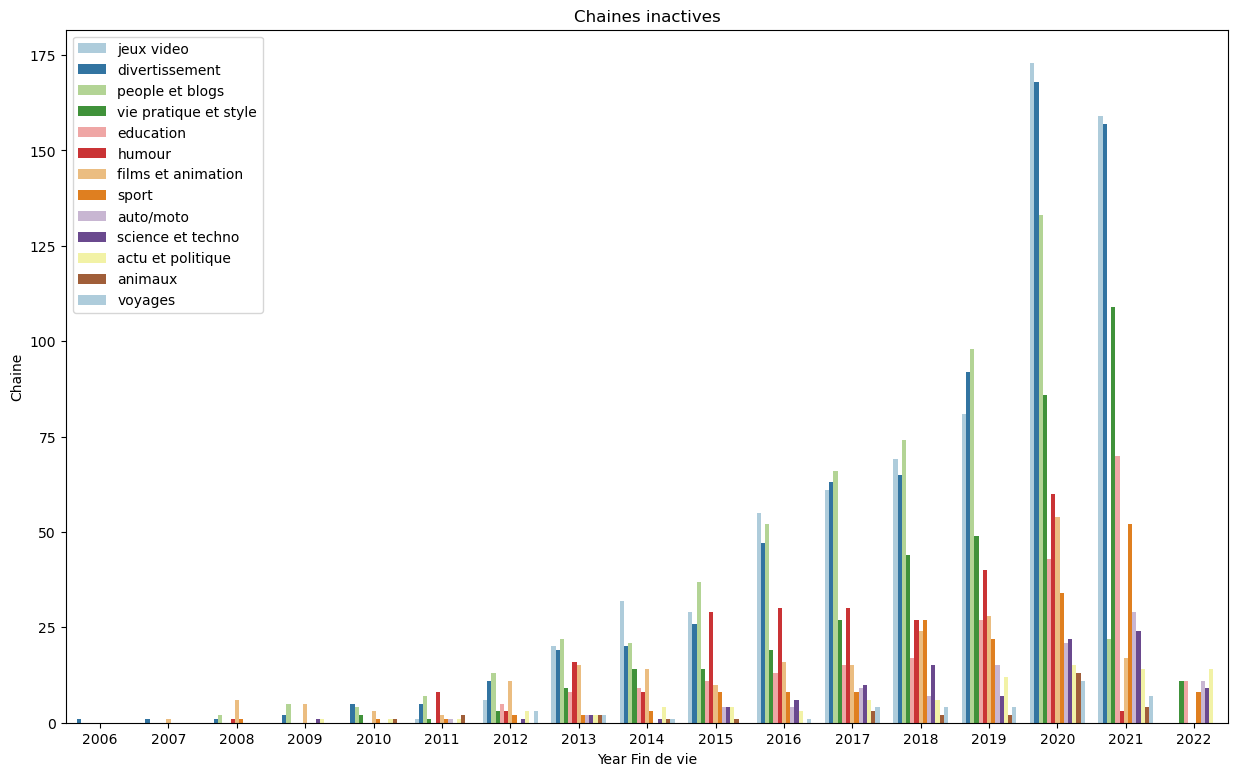

In [38]:
plt.figure(figsize=(15,9))

sns.barplot(x = 'Year Fin de vie',y = 'Chaine',hue = 'category',data = inactif1,palette="Paired")

plt.legend(loc = 'upper left')
plt.title('Chaines inactives')

plt.show()

In [39]:
inactif['created'] = pd.to_datetime(top_channel['created'])
inactif

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\2423736947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactif['created'] = pd.to_datetime(top_channel['created'])


display_name  subscribers                   created  \
15                   CHAQUE DETAIL     714000.0 2017-11-08 22:19:23+00:00   
26                       DEO TOONS    1400000.0 2017-04-16 17:59:48+00:00   
34                         e-dison    1100000.0 2017-10-23 10:27:30+00:00   
39                          Plan C      79100.0 2017-03-14 15:30:11+00:00   
53                 Rap Fighter Cup     134000.0 2018-10-08 18:10:08+00:00   
...                            ...          ...                       ...   
12745     Learn French with Gaelle      16300.0 2015-06-19 22:23:42+00:00   
12749       Permaculture Autonomie      15800.0 2018-07-23 22:26:11+00:00   
12752   DC Super Hero Girls France     261000.0 2015-10-22 18:57:00+00:00   
12754  Han's Edu Playhouse [토이포키즈]     335000.0 2017-04-16 21:30:16+00:00   
12756                    Takko art      37800.0 2019-01-27 21:55:21+00:00   

                    category    content_owner_id  videos_views  videos  \
15        films et animation       CHAQUE DETAIL      14190664       2   
26        films et animation              wizdeo      94204176      17   
34            divertissement              Wizdeo     116193669     237   
39            divertissement    TF1 (TV Content)       8235057      18   
53        films et animation  France Télévisions      19241140       8   
...                      ...                 ...           ...     ...   
12745         divertissement         Not Partner        691737     123   
12749  vie pratique et style                 NaN       1002002      60   
12752     films et animation                 NaN     151814037     394   
12754              education                 NaN     111226774      22   
12756  vie pratique et style                 NaN       1587908      22   

       comments      likes  dislikes  \
15      31010.0   681774.0    8269.0   
26     218612.0  5073607.0   37875.0   
34     240516.0  4474426.0  174110.0   
39       6553.0   223961.0    5252.0   
53     145606.0   243948.0    5485.0   
...         ...        ...       ...   
12745    4139.0    30271.0     411.0   
12749    4415.0    24756.0    1148.0   
12752       NaN   576112.0  120427.0   
12754       NaN   364270.0  214705.0   
12756    3583.0    71878.0    1356.0   

                                          Derniere Video  \
15                            Wil Aime - Une Idée Royale   
26             Clown - Chaussures Rouges (Clip Officiel)   
34                                 Vidéo hommage e-dison   
39     Carpool Karaoké - Camille Combal &amp; Angèle ...   
53     RAP FIGHTER CUP #7 - NIDPOOL (FAF LARAGE) VS V...   
...                                                  ...   
12745                            Live French with Gaelle   
12749      Les canards ne mangent pas que des limaces...   
12752         #Souriez | DC Super Hero Girls en Français   
12754  Ambulance, Camions De Pompiers, Excavatrice, C...   
12756  Mon ÉVOLUTION En DESSIN D&#39;OBSERVATION ! ( ...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
15     2020-11-02T15:38:39Z                      0     fr   
26     2020-12-23T12:07:08Z                      0     en   
34     2020-10-26T12:58:47Z                      0     fr   
39     2020-02-26T18:00:08Z                      0     fr   
53     2019-05-15T15:35:13Z                      0     de   
...                     ...                    ...    ...   
12745  2021-08-29T03:57:43Z                      7     en   
12749  2021-08-24T12:09:40Z                      3     fr   
12752  2021-01-01T07:00:00Z                      0     fr   
12754  2020-12-12T07:00:01Z                      0     fr   
12756  2021-11-03T10:45:10Z                      8     de   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
15    2020-11-02 15:38:39+00:00                                 1195   
26    2020-12-23 12:07:08+00:00                                 1144   
34    2020-10-26 12:58:47+00:00                          

In [40]:
inactif["Year Debut de vie"] = inactif["created"].dt.year
inactif

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\1757077345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactif["Year Debut de vie"] = inactif["created"].dt.year


display_name  subscribers                   created  \
15                   CHAQUE DETAIL     714000.0 2017-11-08 22:19:23+00:00   
26                       DEO TOONS    1400000.0 2017-04-16 17:59:48+00:00   
34                         e-dison    1100000.0 2017-10-23 10:27:30+00:00   
39                          Plan C      79100.0 2017-03-14 15:30:11+00:00   
53                 Rap Fighter Cup     134000.0 2018-10-08 18:10:08+00:00   
...                            ...          ...                       ...   
12745     Learn French with Gaelle      16300.0 2015-06-19 22:23:42+00:00   
12749       Permaculture Autonomie      15800.0 2018-07-23 22:26:11+00:00   
12752   DC Super Hero Girls France     261000.0 2015-10-22 18:57:00+00:00   
12754  Han's Edu Playhouse [토이포키즈]     335000.0 2017-04-16 21:30:16+00:00   
12756                    Takko art      37800.0 2019-01-27 21:55:21+00:00   

                    category    content_owner_id  videos_views  videos  \
15        films et animation       CHAQUE DETAIL      14190664       2   
26        films et animation              wizdeo      94204176      17   
34            divertissement              Wizdeo     116193669     237   
39            divertissement    TF1 (TV Content)       8235057      18   
53        films et animation  France Télévisions      19241140       8   
...                      ...                 ...           ...     ...   
12745         divertissement         Not Partner        691737     123   
12749  vie pratique et style                 NaN       1002002      60   
12752     films et animation                 NaN     151814037     394   
12754              education                 NaN     111226774      22   
12756  vie pratique et style                 NaN       1587908      22   

       comments      likes  dislikes  \
15      31010.0   681774.0    8269.0   
26     218612.0  5073607.0   37875.0   
34     240516.0  4474426.0  174110.0   
39       6553.0   223961.0    5252.0   
53     145606.0   243948.0    5485.0   
...         ...        ...       ...   
12745    4139.0    30271.0     411.0   
12749    4415.0    24756.0    1148.0   
12752       NaN   576112.0  120427.0   
12754       NaN   364270.0  214705.0   
12756    3583.0    71878.0    1356.0   

                                          Derniere Video  \
15                            Wil Aime - Une Idée Royale   
26             Clown - Chaussures Rouges (Clip Officiel)   
34                                 Vidéo hommage e-dison   
39     Carpool Karaoké - Camille Combal &amp; Angèle ...   
53     RAP FIGHTER CUP #7 - NIDPOOL (FAF LARAGE) VS V...   
...                                                  ...   
12745                            Live French with Gaelle   
12749      Les canards ne mangent pas que des limaces...   
12752         #Souriez | DC Super Hero Girls en Français   
12754  Ambulance, Camions De Pompiers, Excavatrice, C...   
12756  Mon ÉVOLUTION En DESSIN D&#39;OBSERVATION ! ( ...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
15     2020-11-02T15:38:39Z                      0     fr   
26     2020-12-23T12:07:08Z                      0     en   
34     2020-10-26T12:58:47Z                      0     fr   
39     2020-02-26T18:00:08Z                      0     fr   
53     2019-05-15T15:35:13Z                      0     de   
...                     ...                    ...    ...   
12745  2021-08-29T03:57:43Z                      7     en   
12749  2021-08-24T12:09:40Z                      3     fr   
12752  2021-01-01T07:00:00Z                      0     fr   
12754  2020-12-12T07:00:01Z                      0     fr   
12756  2021-11-03T10:45:10Z                      8     de   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
15    2020-11-02 15:38:39+00:00                                 1195   
26    2020-12-23 12:07:08+00:00                                 1144   
34    2020-10-26 12:58:47+00:00                          

In [41]:
inactif['Durée de vie de la chaine'] = (inactif['Date derniere video'].dt.date - inactif['created'].dt.date).dt.days
inactif = inactif.loc[inactif['Year Debut de vie'] != 1970]
inactif

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\3129793316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactif['Durée de vie de la chaine'] = (inactif['Date derniere video'].dt.date - inactif['created'].dt.date).dt.days


display_name  subscribers                   created  \
15                   CHAQUE DETAIL     714000.0 2017-11-08 22:19:23+00:00   
26                       DEO TOONS    1400000.0 2017-04-16 17:59:48+00:00   
34                         e-dison    1100000.0 2017-10-23 10:27:30+00:00   
39                          Plan C      79100.0 2017-03-14 15:30:11+00:00   
53                 Rap Fighter Cup     134000.0 2018-10-08 18:10:08+00:00   
...                            ...          ...                       ...   
12745     Learn French with Gaelle      16300.0 2015-06-19 22:23:42+00:00   
12749       Permaculture Autonomie      15800.0 2018-07-23 22:26:11+00:00   
12752   DC Super Hero Girls France     261000.0 2015-10-22 18:57:00+00:00   
12754  Han's Edu Playhouse [토이포키즈]     335000.0 2017-04-16 21:30:16+00:00   
12756                    Takko art      37800.0 2019-01-27 21:55:21+00:00   

                    category    content_owner_id  videos_views  videos  \
15        films et animation       CHAQUE DETAIL      14190664       2   
26        films et animation              wizdeo      94204176      17   
34            divertissement              Wizdeo     116193669     237   
39            divertissement    TF1 (TV Content)       8235057      18   
53        films et animation  France Télévisions      19241140       8   
...                      ...                 ...           ...     ...   
12745         divertissement         Not Partner        691737     123   
12749  vie pratique et style                 NaN       1002002      60   
12752     films et animation                 NaN     151814037     394   
12754              education                 NaN     111226774      22   
12756  vie pratique et style                 NaN       1587908      22   

       comments      likes  dislikes  ...   Date de publication  \
15      31010.0   681774.0    8269.0  ...  2020-11-02T15:38:39Z   
26     218612.0  5073607.0   37875.0  ...  2020-12-23T12:07:08Z   
34     240516.0  4474426.0  174110.0  ...  2020-10-26T12:58:47Z   
39       6553.0   223961.0    5252.0  ...  2020-02-26T18:00:08Z   
53     145606.0   243948.0    5485.0  ...  2019-05-15T15:35:13Z   
...         ...        ...       ...  ...                   ...   
12745    4139.0    30271.0     411.0  ...  2021-08-29T03:57:43Z   
12749    4415.0    24756.0    1148.0  ...  2021-08-24T12:09:40Z   
12752       NaN   576112.0  120427.0  ...  2021-01-01T07:00:00Z   
12754       NaN   364270.0  214705.0  ...  2020-12-12T07:00:01Z   
12756    3583.0    71878.0    1356.0  ...  2021-11-03T10:45:10Z   

      nbVidSince_2021-06-30  Langue       Date derniere video  \
15                        0      fr 2020-11-02 15:38:39+00:00   
26                        0      en 2020-12-23 12:07:08+00:00   
34                        0      fr 2020-10-26 12:58:47+00:00   
39                        0      fr 2020-02-26 18:00:08+00:00   
53                        0      de 2019-05-15 15:35:13+00:00   
...                     ...     ...                       ...   
12745                     7      en 2021-08-29 03:57:43+00:00   
12749                     3      fr 2021-08-24 12:09:40+00:00   
12752                     0      fr 2021-01-01 07:00:00+00:00   
12754                     0      fr 2020-12-12 07:00:01+00:00   
12756                     8      de 2021-11-03 10:45:10+00:00   

      Temps depuis dernière vidéo (jours)      moyenne    Actif  \
15                                   1195  1025.543814  Inactif   
26                                   1144  1025.543814  Inactif   
34                                   1202   819.586930  Inactif   
39                                   1444   819.586930  Inactif   
53                                   1732  1025.543814  Inactif   
...                                   ...          ...      ...   
12745                                 895   819.586930  Inactif   
12749                                 900   747.661247  Inactif   
12752              

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


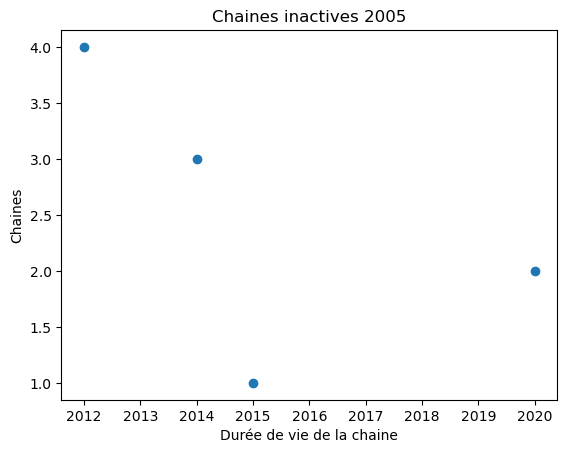

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


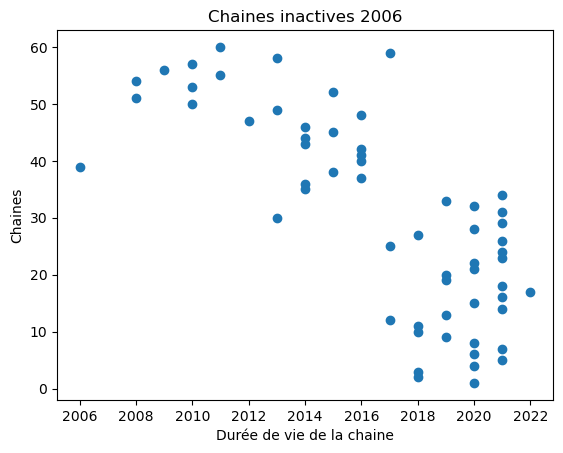

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


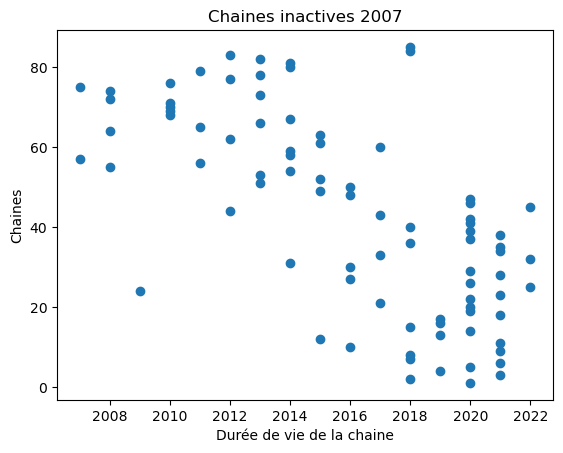

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


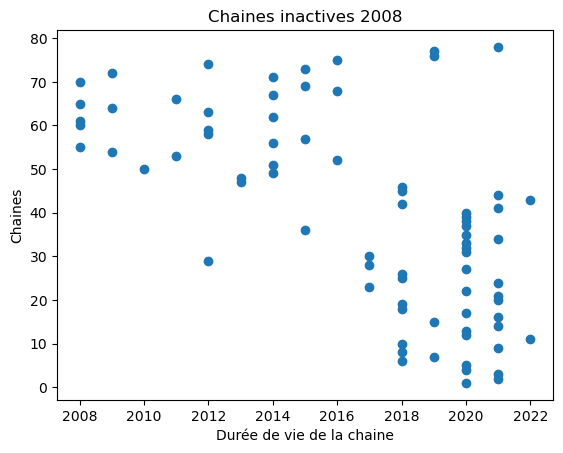

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


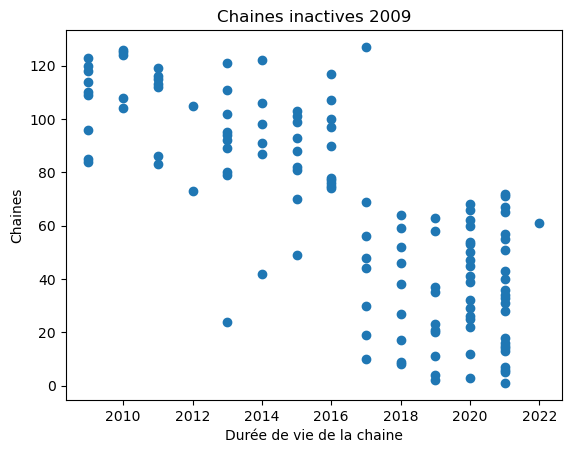

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


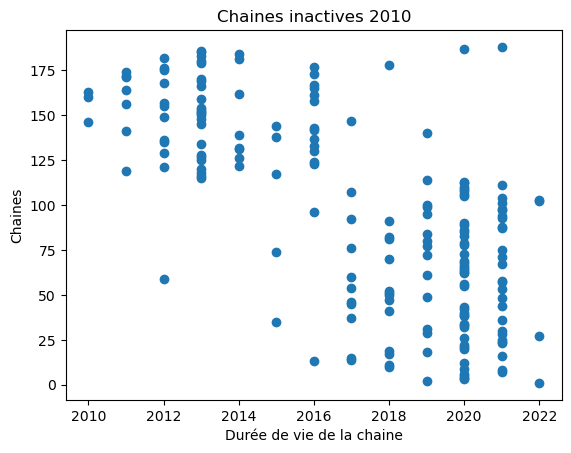

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


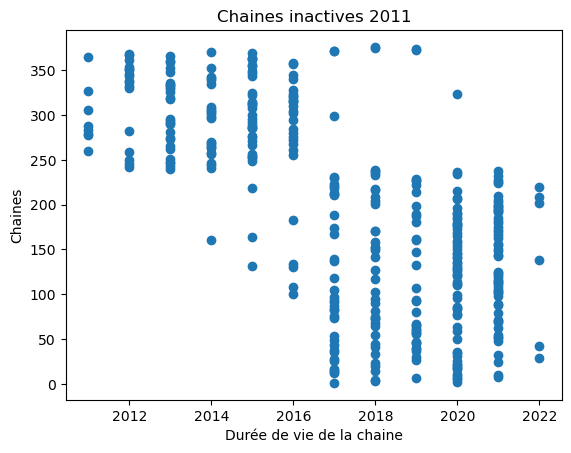

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


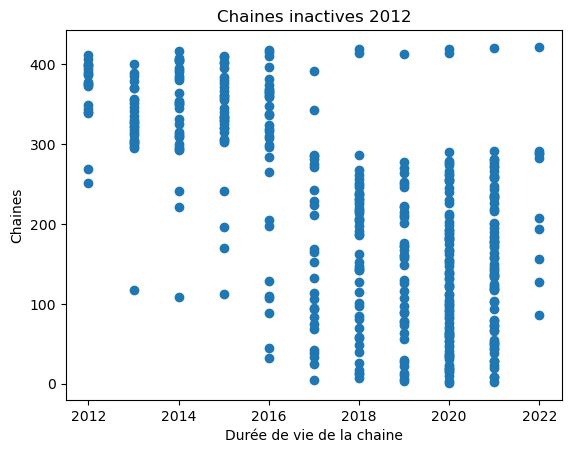

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


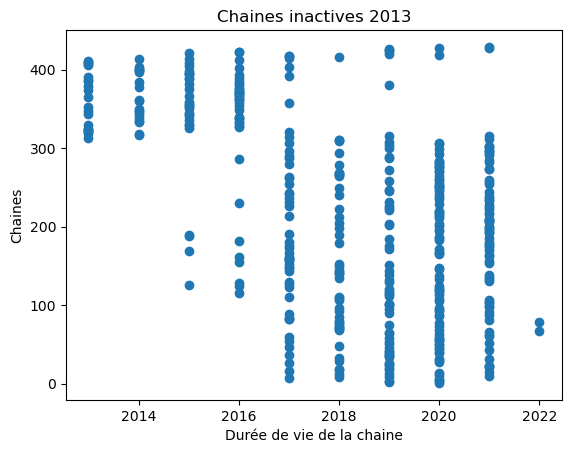

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


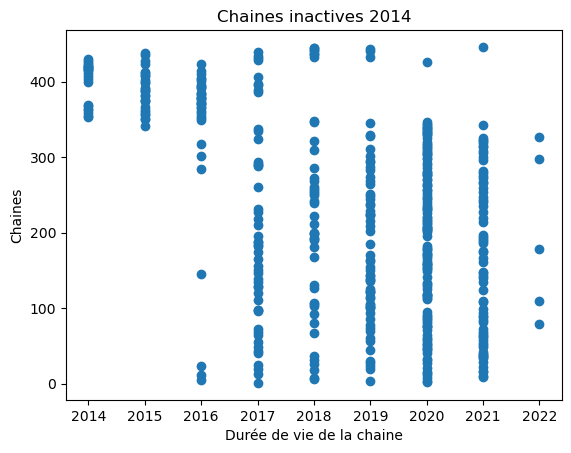

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


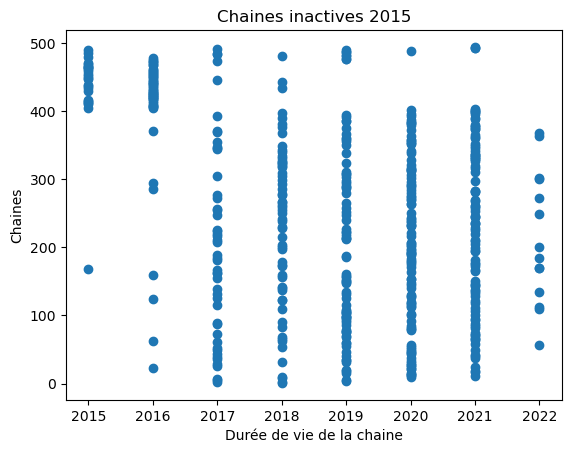

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


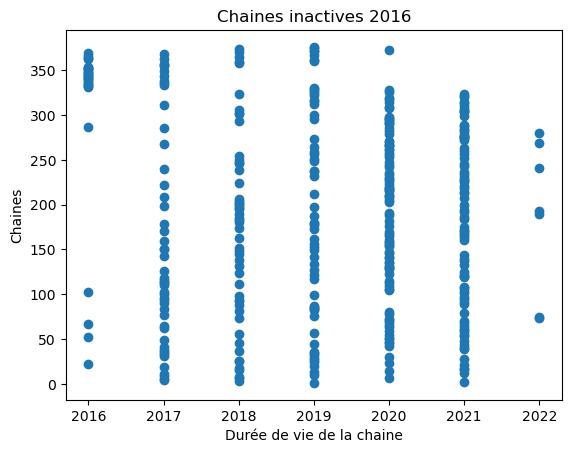

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


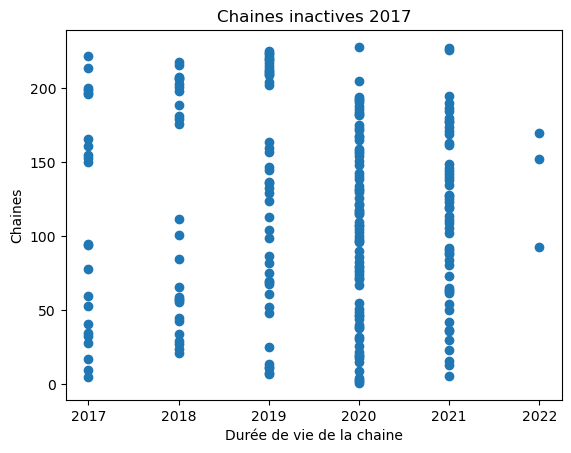

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


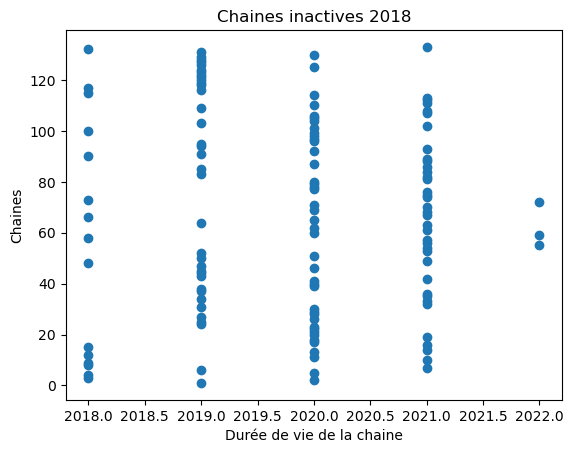

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


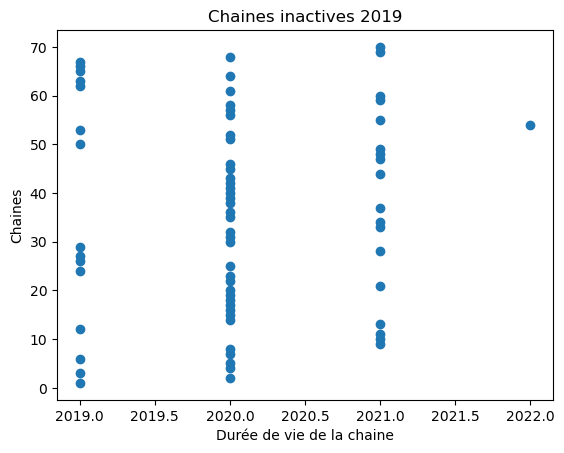

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


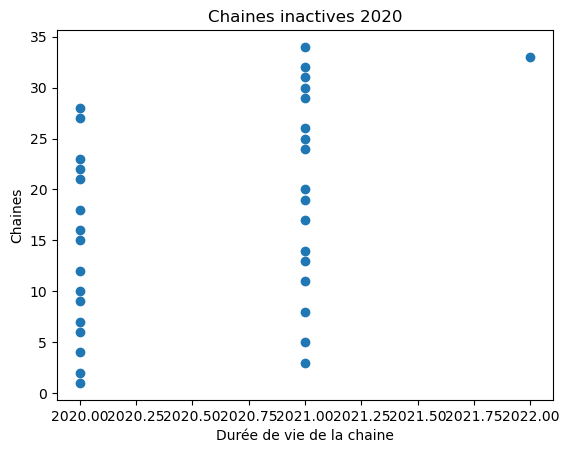

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


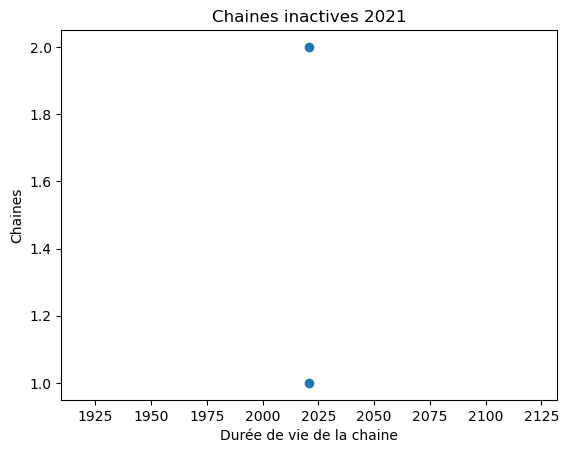

C:\Users\andyg\AppData\Local\Temp\ipykernel_28440\199904831.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = range(1, len(df)+1)


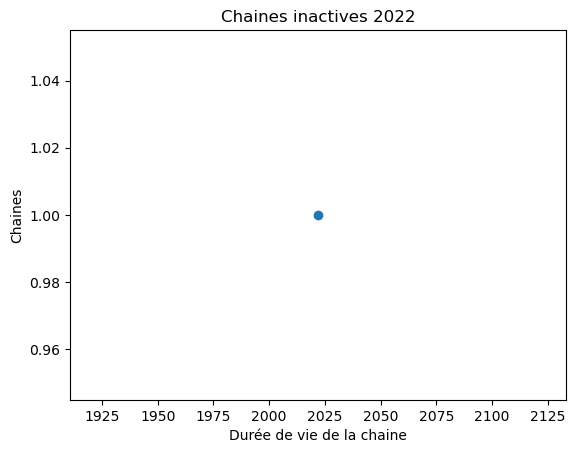

In [42]:
# Déterminationd des chaînes inactives en année
annees_debut = sorted(inactif['Year Debut de vie'].unique())

# Parcourir la liste des années de début de vie
for annee in annees_debut:
    # Créer un DataFrame contenant les données pour l'année en cours
    df = inactif[inactif['Year Debut de vie']==annee]
    
    # Ajouter une colonne numérotant les lignes
    df['num'] = range(1, len(df)+1)
    
    # Créer un nuage de points en utilisant la fonction scatter() de Pandas
    plt.scatter(df['Year Fin de vie'], df['num'])
    
    # Définir les labels des axes et le titre du graphique
    plt.xlabel('Durée de vie de la chaine')
    plt.ylabel('Chaines')
    plt.title(f'Chaines inactives {annee}')
    
    # Afficher le nuage de points
    plt.show()

In [43]:
inactif

display_name  subscribers                   created  \
15                   CHAQUE DETAIL     714000.0 2017-11-08 22:19:23+00:00   
26                       DEO TOONS    1400000.0 2017-04-16 17:59:48+00:00   
34                         e-dison    1100000.0 2017-10-23 10:27:30+00:00   
39                          Plan C      79100.0 2017-03-14 15:30:11+00:00   
53                 Rap Fighter Cup     134000.0 2018-10-08 18:10:08+00:00   
...                            ...          ...                       ...   
12745     Learn French with Gaelle      16300.0 2015-06-19 22:23:42+00:00   
12749       Permaculture Autonomie      15800.0 2018-07-23 22:26:11+00:00   
12752   DC Super Hero Girls France     261000.0 2015-10-22 18:57:00+00:00   
12754  Han's Edu Playhouse [토이포키즈]     335000.0 2017-04-16 21:30:16+00:00   
12756                    Takko art      37800.0 2019-01-27 21:55:21+00:00   

                    category    content_owner_id  videos_views  videos  \
15        films et animation       CHAQUE DETAIL      14190664       2   
26        films et animation              wizdeo      94204176      17   
34            divertissement              Wizdeo     116193669     237   
39            divertissement    TF1 (TV Content)       8235057      18   
53        films et animation  France Télévisions      19241140       8   
...                      ...                 ...           ...     ...   
12745         divertissement         Not Partner        691737     123   
12749  vie pratique et style                 NaN       1002002      60   
12752     films et animation                 NaN     151814037     394   
12754              education                 NaN     111226774      22   
12756  vie pratique et style                 NaN       1587908      22   

       comments      likes  dislikes  ...   Date de publication  \
15      31010.0   681774.0    8269.0  ...  2020-11-02T15:38:39Z   
26     218612.0  5073607.0   37875.0  ...  2020-12-23T12:07:08Z   
34     240516.0  4474426.0  174110.0  ...  2020-10-26T12:58:47Z   
39       6553.0   223961.0    5252.0  ...  2020-02-26T18:00:08Z   
53     145606.0   243948.0    5485.0  ...  2019-05-15T15:35:13Z   
...         ...        ...       ...  ...                   ...   
12745    4139.0    30271.0     411.0  ...  2021-08-29T03:57:43Z   
12749    4415.0    24756.0    1148.0  ...  2021-08-24T12:09:40Z   
12752       NaN   576112.0  120427.0  ...  2021-01-01T07:00:00Z   
12754       NaN   364270.0  214705.0  ...  2020-12-12T07:00:01Z   
12756    3583.0    71878.0    1356.0  ...  2021-11-03T10:45:10Z   

      nbVidSince_2021-06-30  Langue       Date derniere video  \
15                        0      fr 2020-11-02 15:38:39+00:00   
26                        0      en 2020-12-23 12:07:08+00:00   
34                        0      fr 2020-10-26 12:58:47+00:00   
39                        0      fr 2020-02-26 18:00:08+00:00   
53                        0      de 2019-05-15 15:35:13+00:00   
...                     ...     ...                       ...   
12745                     7      en 2021-08-29 03:57:43+00:00   
12749                     3      fr 2021-08-24 12:09:40+00:00   
12752                     0      fr 2021-01-01 07:00:00+00:00   
12754                     0      fr 2020-12-12 07:00:01+00:00   
12756                     8      de 2021-11-03 10:45:10+00:00   

      Temps depuis dernière vidéo (jours)      moyenne    Actif  \
15                                   1195  1025.543814  Inactif   
26                                   1144  1025.543814  Inactif   
34                                   1202   819.586930  Inactif   
39                                   1444   819.586930  Inactif   
53                                   1732  1025.543814  Inactif   
...                                   ...          ...      ...   
12745                                 895   819.586930  Inactif   
12749                                 900   747.661247  Inactif   
12752              

In [44]:
# Grouper les données par année et calculer la moyenne de durée de vie
df_grouped = inactif.groupby('Year Fin de vie')['Durée de vie de la chaine'].mean().reset_index()
df_grouped = df_grouped.rename(columns={'Durée de vie de la chaine': 'Moyenne de vie'})

# Calculer les gains moyens en jours par rapport à l'année précédente
df_grouped['Gains moyens en jours'] = df_grouped['Moyenne de vie'].diff()

# Afficher le tableau résultant
print(df_grouped)

    Year Fin de vie  Moyenne de vie  Gains moyens en jours
0              2006       63.000000                    NaN
1              2007      117.500000              54.500000
2              2008      277.909091             160.409091
3              2009      252.714286             -25.194805
4              2010      767.647059             514.932773
5              2011      660.413793            -107.233266
6              2012      608.196721             -52.217072
7              2013      793.834711             185.637989
8              2014     1001.132812             207.298102
9              2015     1047.039548              45.906736
10             2016     1140.137795              93.098247
11             2017     1291.892744             151.754949
12             2018     1674.837270             382.944526
13             2019     1752.647799              77.810528
14             2020     2205.227163             452.579365
15             2021     2569.653673             364.4265

In [45]:
# Grouper les données par année et calculer la moyenne de durée de vie
df_grouped2 = inactif.groupby('Year Debut de vie')['Durée de vie de la chaine'].mean().reset_index()
df_grouped2 = df_grouped2.rename(columns={'Durée de vie de la chaine': 'Moyenne de vie'})

# Calculer les gains moyens en jours par rapport à l'année précédente
df_grouped2['Gains moyens en jours (N-1)'] = df_grouped2['Moyenne de vie'].diff()

# Afficher le tableau résultant
print(df_grouped2)

    Year Debut de vie  Moyenne de vie  Gains moyens en jours (N-1)
0                2005     3602.750000                          NaN
1                2006     3813.966667                   211.216667
2                2007     3288.894118                  -525.072549
3                2008     3141.064103                  -147.830015
4                2009     2746.417323                  -394.646780
5                2010     2622.430851                  -123.986472
6                2011     2311.244681                  -311.186170
7                2012     2099.379147                  -211.865534
8                2013     1874.058275                  -225.320872
9                2014     1686.069507                  -187.988768
10               2015     1398.437247                  -287.632260
11               2016     1162.178191                  -236.259055
12               2017      957.644737                  -204.533455
13               2018      695.556391                  -262.08

In [46]:
top_channel3['created'] = pd.to_datetime(top_channel3['created'])

top_channel3

display_name  subscribers  \
0                       Dinor Rdt     394000.0   
1                        Mister V    5950000.0   
2                        SQUEEZIE   17100000.0   
3                         Cyprien   14400000.0   
4          NORMAN FAIT DES VIDÉOS   12000000.0   
...                           ...          ...   
12762                    No Limit     118000.0   
12763           Best of Flashback      32400.0   
12764              TheGreatReview      99600.0   
12765                    AMELINKA      45400.0   
12766  La chaîne de Serge Faubert      69400.0   

                               created           category  content_owner_id  \
0            2015-02-04 22:27:39+00:00    people et blogs       Not Partner   
1            2008-11-20 20:37:04+00:00             humour  Golden Network A   
2            2011-01-09 01:56:21+00:00     divertissement              Bump   
3            2007-02-25 22:14:05+00:00             humour       TalentWeb_A   
4            2011-01-04 00:45:42+00:00             humour   Webedia Talents   
...                                ...                ...               ...   
12762 2021-06-25 16:30:58.654441+00:00    people et blogs       Not Partner   
12763 2021-01-25 16:49:14.031325+00:00         jeux video               NaN   
12764        2015-05-14 14:16:36+00:00         jeux video               NaN   
12765 2019-12-07 11:57:58.242424+00:00         jeux video       Not Partner   
12766        2017-03-30 08:35:29+00:00  actu et politique               NaN   

       videos_views  videos    comments        likes   dislikes  \
0          62674059       2     12629.0     348226.0     4568.0   
1         429912812      29    331434.0   11418864.0   146141.0   
2        9160358350    1464  14947334.0  321530757.0  5401198.0   
3        2990519445     205   3653340.0   80004547.0  2028946.0   
4        2674211346     204   2679824.0   65923055.0  1895361.0   
...             ...     ...         ...          ...        ...   
12762      68086620       2       478.0      28724.0      613.0   
12763       3831511     147      6875.0     209014.0     2030.0   
12764       3001227      22      3724.0      60602.0      492.0   
12765        211928       2         NaN          NaN        NaN   
12766        817354       3     11258.0      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
0      2022-06-29T18:00:12Z                      2     fr   
1      2022-12-11T17:00:30Z                      2     de   
2      2023-02-22T17:49:02Z                     63     fr   
3      2022-12-27T12:32:43Z                     22     tl   
4      2022-11-25T16:06:43Z                     14     fr   
...                     ...                    ...    ...   
12762  2022-06-17T14:00:12Z                      2     it   
12763  2022-01-01T19:18:52Z                     42     en   
12764  2023-01-22T10:00:29Z                      4     fr   
12765  2023-02-24T15:00:04Z                      3     fr   
12766  2023-02-20T18:30:47Z                      3     fr   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
0     2022-06-29 18:00:12+00:00                                  590   
1     2022-12-11 17:00:30+00:00                                  425

In [47]:
top_channel3['year debut'] = top_channel3['created'].dt.year
top_channel3

display_name  subscribers  \
0                       Dinor Rdt     394000.0   
1                        Mister V    5950000.0   
2                        SQUEEZIE   17100000.0   
3                         Cyprien   14400000.0   
4          NORMAN FAIT DES VIDÉOS   12000000.0   
...                           ...          ...   
12762                    No Limit     118000.0   
12763           Best of Flashback      32400.0   
12764              TheGreatReview      99600.0   
12765                    AMELINKA      45400.0   
12766  La chaîne de Serge Faubert      69400.0   

                               created           category  content_owner_id  \
0            2015-02-04 22:27:39+00:00    people et blogs       Not Partner   
1            2008-11-20 20:37:04+00:00             humour  Golden Network A   
2            2011-01-09 01:56:21+00:00     divertissement              Bump   
3            2007-02-25 22:14:05+00:00             humour       TalentWeb_A   
4            2011-01-04 00:45:42+00:00             humour   Webedia Talents   
...                                ...                ...               ...   
12762 2021-06-25 16:30:58.654441+00:00    people et blogs       Not Partner   
12763 2021-01-25 16:49:14.031325+00:00         jeux video               NaN   
12764        2015-05-14 14:16:36+00:00         jeux video               NaN   
12765 2019-12-07 11:57:58.242424+00:00         jeux video       Not Partner   
12766        2017-03-30 08:35:29+00:00  actu et politique               NaN   

       videos_views  videos    comments        likes   dislikes  \
0          62674059       2     12629.0     348226.0     4568.0   
1         429912812      29    331434.0   11418864.0   146141.0   
2        9160358350    1464  14947334.0  321530757.0  5401198.0   
3        2990519445     205   3653340.0   80004547.0  2028946.0   
4        2674211346     204   2679824.0   65923055.0  1895361.0   
...             ...     ...         ...          ...        ...   
12762      68086620       2       478.0      28724.0      613.0   
12763       3831511     147      6875.0     209014.0     2030.0   
12764       3001227      22      3724.0      60602.0      492.0   
12765        211928       2         NaN          NaN        NaN   
12766        817354       3     11258.0      67898.0      778.0   

                                          Derniere Video  \
0                               Dinor rdt - Roue Arrière   
1                                   MISTER V - LES JONES   
2      Elle a fait une sombre découverte... (4 vraies...   
3          Vous n&#39;avez pas vu ça (making of Fujisan)   
4            LA COUPE DU MONDE (Pour ou Contre?)(Norman)   
...                                                  ...   
12762  No Limit, Tayc, Hamza – Laisse moi te dire (Cl...   
12763  MEDJA RP HAGAR, ZWAVE FOU RIRE 😂(Best of Flash...   
12764  Qu&#39;est-ce que le cinéma a appris au jeu vi...   
12765       S&#39;ÉCHAPPER du GROS BÉBÉ de ROBLOX (Obby)   
12766  BORDÉLISATION DES DÉBATS : la bonne stratégie,...   

        Date de publication  nbVidSince_2021-06-30 Langue  \
0      2022-06-29T18:00:12Z                      2     fr   
1      2022-12-11T17:00:30Z                      2     de   
2      2023-02-22T17:49:02Z                     63     fr   
3      2022-12-27T12:32:43Z                     22     tl   
4      2022-11-25T16:06:43Z                     14     fr   
...                     ...                    ...    ...   
12762  2022-06-17T14:00:12Z                      2     it   
12763  2022-01-01T19:18:52Z                     42     en   
12764  2023-01-22T10:00:29Z                      4     fr   
12765  2023-02-24T15:00:04Z                      3     fr   
12766  2023-02-20T18:30:47Z                      3     fr   

            Date derniere video  Temps depuis dernière vidéo (jours)  \
0     2022-06-29 18:00:12+00:00                                  590   
1     2022-12-11 17:00:30+00:00                                  425